# STINTSY Machine Project

**SS1 - Group 3**
1. BERENGUER, Beatrice A.
2. BUENDIA, Leigh Arriane S.
3. ENRIQUEZ, Manolo L.

## **Description of the Task**

With the dataset selected, the project aims to create a machine learning model that will accurately classify whether a smoke detector device should be triggered or not. 

**<h2> List of Requirements**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

## **Description of the Dataset**

The dataset selected is the **Smoke Detection Dataset** from Kaggle. The link to the dataset can be found here: https://www.kaggle.com/datasets/deepcontractor/smoke-detection-dataset

Collection of training data is performed with the help of IOT devices since the goal is to develop an AI based smoke detector device. Many different environments and fire sources have to be sampled to ensure a good dataset for training. A short list of different scenarios which are captured:

* Normal indoor
* Normal outdoor
* Indoor wood fire, firefighter training area
* Indoor gas fire, firefighter training area
* Outdoor wood, coal, and gas grill
* Outdoor high humidity etc.

The dataset is able to capture these scenarios through the features it contains. The following is a full list of the features and their descriptions:

* `UTC` - Timestamp UTC seconds
* `Temperature` - Air Temperature
* `Humidity` - Air Humidity
* `TVOC` - Total Volatile Organic Compounds; measured in parts per billion
* `eCo2` - co2 equivalent concentration; calculated from different values like TVCO
* `Raw H2` - raw molecular hydrogen; not compensated (Bias, temperature, etc.)
* `Raw Ethanol` - raw ethanol gas
* `Pressure` - Air pressure
* `PM1.0` - Particulate matter size < 1.0 µm (PM1.0). 1.0 µm < 2.5 µm (PM2.5)
* `PM2.5` - Particulate matter size < 1.0 µm (PM1.0). 1.0 µm < 2.5 µm (PM2.5)
* `NC0.5` - Number concentration of particulate matter. This differs from PM because NC gives the actual number of particles in the air. The raw NC is also classified by the particle size: < 0.5 µm (NC0.5); 0.5 µm < 1.0 µm (NC1.0); 1.0 µm < 2.5 µm (NC2.5);
* `NC1.0` - Number concentration of particulate matter. This differs from PM because NC gives the actual number of particles in the air. The raw NC is also classified by the particle size: < 0.5 µm (NC0.5); 0.5 µm < 1.0 µm (NC1.0); 1.0 µm < 2.5 µm (NC2.5);
* `NC2.5` - Number concentration of particulate matter. This differs from PM because NC gives the actual number of particles in the air. The raw NC is also classified by the particle size: < 0.5 µm (NC0.5); 0.5 µm < 1.0 µm (NC1.0); 1.0 µm < 2.5 µm (NC2.5);
* `CNT` - Sample counter 
* `Fire Alarm` - Ground truth is "1" if a fire is there

First, let us read the dataset and display the first few rows in the file.

In [2]:
data=pd.read_csv('smoke_detection_iot.csv')
data.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


Let us see how many our data is.

In [3]:
data.shape

(62630, 16)

The data type of each feature in the dataset is seen below. Here we can see that all features are of data type `int64` or `float64`, categorizing this dataset to contain continuous values.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


Per feature, the number of unique values are found below.

In [5]:
data.nunique()

Unnamed: 0        62630
UTC               62630
Temperature[C]    21672
Humidity[%]        3890
TVOC[ppb]          1966
eCO2[ppm]          1713
Raw H2             1830
Raw Ethanol        2659
Pressure[hPa]      2213
PM1.0              1337
PM2.5              1351
NC0.5              3093
NC1.0              4113
NC2.5              1161
CNT               24994
Fire Alarm            2
dtype: int64

**<h2> Data Preprocessing and Cleaning**

This section covers data cleaning and preprocessing techniques that are essential to perform before using the dataset for model training. First, let us clean the data to be able to process it properly and efficiently later on.

Let us start the data cleaning process by checking for any null values.

In [6]:
data.isnull().sum()

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

Great, there are no null values in the dataset. Let us now check for any duplicate data.

In [7]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
62625    False
62626    False
62627    False
62628    False
62629    False
Length: 62630, dtype: bool

In [8]:
(data.duplicated()=='False').count()

62630

Now that we have checked for null and duplicate values, we can remove any unnecessary columns in the dataset that we will not use for model training. We can drop the `Unnamed: 0` and `UTC` features because these will be irrelevant for model training.

In [9]:
data.drop(['Unnamed: 0', 'UTC'], axis = 1, inplace = True)
data.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


We can now assign our `X` and `y` values. `X` will contain the data from all the columns except the `Fire Alarm` column. On the other hand, `y` will contain the data from the `Fire Alarm` column.

In [11]:
X = data.drop(['Fire Alarm'], axis = 1)
X.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4


In [12]:
y = data['Fire Alarm']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Fire Alarm, dtype: int64

Now that we've assigned our data `X` and `y`, we are almost ready for model training. We can observe that our data values in different columns are very far apart from each other. `Raw H2` and `Raw Ethanol` have values of 12,000 and 18,000 above, while other columns would have very small numbers that are close to 0.

To address this, we scale the data's range of values to fit within 0-1.

In [13]:
scale = MinMaxScaler()

In [14]:
X = pd.DataFrame(scale.fit_transform(X),columns=X.columns)
X.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
0,0.512692,0.723239,0.0,0.0,0.522488,0.525685,0.986014,0.0,0.0,0.0,0.0,0.0,0.00000
1,0.512875,0.712535,0.0,0.0,0.534928,0.547185,0.987013,0.0,0.0,0.0,0.0,0.0,0.00004
2,0.513046,0.701520,0.0,0.0,0.544179,0.565731,0.986347,0.0,0.0,0.0,0.0,0.0,0.00008
3,0.513229,0.690971,0.0,0.0,0.549282,0.579682,0.986125,0.0,0.0,0.0,0.0,0.0,0.00012
4,0.513412,0.681818,0.0,0.0,0.553429,0.591498,0.987013,0.0,0.0,0.0,0.0,0.0,0.00016


With normalized data, we can now split our data to have a train and test set. This will be split to `80%` going to the train set and `20%` going to the test set.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=0)

Lastly, before the train and test set can be used, let us check if our target classes are balanced.

In [16]:
y_train.value_counts()

1    35836
0    14268
Name: Fire Alarm, dtype: int64

We can see that the target classes are imbalanced with class `1` having `blank` values, while `0` has `blank`. We can address this through over-sampling the minority class using the **Synthetic Minority Over-sampling Technique**.

In [17]:
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [18]:
y_train.value_counts()

1    35836
0    35836
Name: Fire Alarm, dtype: int64

We can now see that the values of each target class are balanced. Our train and test sets are now ready to be used for model training.

**<h2> Exploratory Data Analysis**

In [19]:
# Import Data Visualization Tools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We will be using 15% of our data for testing and 85% of our data for training. The figure below shows a pie chart of how much will be used for training and testing. The values in the pie chart are 82.6% for training and 17.4% for testing, this is because we used `SMOTE (Synthetic Minority Oversampling Technique)` to balance the training dataset which affects the percentage of the data split.

[71672, 12526]


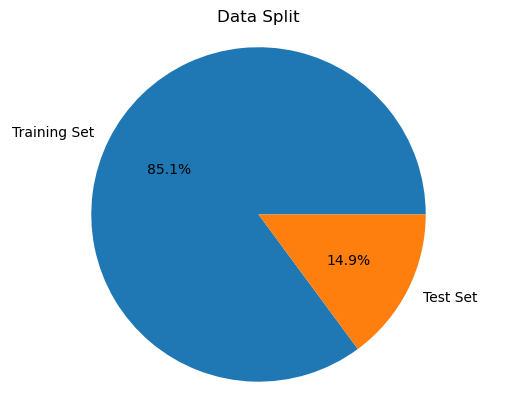

In [20]:
fig, ax = plt.subplots()
ax.pie([X_train.shape[0],X_test.shape[0]], labels=["Training Set", "Test Set"], autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Data Split')
print([X_train.shape[0],X_test.shape[0]])

During data pre-processing and cleaning, we used `SMOTE (Synthetic Minority Oversampling Technique)` in the training dataset which creates a balance in the dataset. The chart below shows that the labels are 50/50 which means that the training dataset has the same amount of number per class. Therefore, models are now easier to train since this prevents becoming biased towards one class.

Text(0.5, 1.0, 'Training Set Labels')

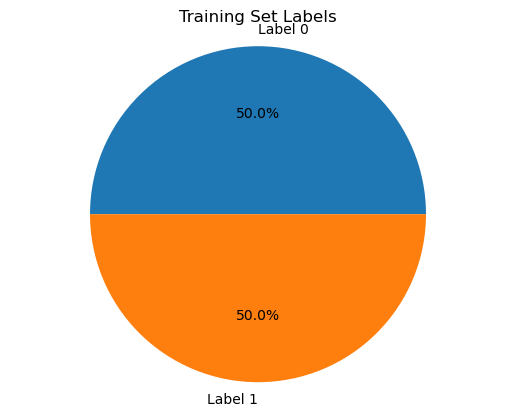

In [21]:
fig, ax = plt.subplots()
ax.pie([y_train.value_counts()[0],y_train.value_counts()[1]], labels=["Label 0", "Label 1"], autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Training Set Labels')

The chart below shows that there are more `Label 0` than `Label 1`. This is because we do not need to balance it since we are already dealing with the test data which should be authentic in order to test if our model really is accurate. The chart below shows the data of how many rows there are per class which are 28.8% for `0` (No fire detected) and 71.2% for `1` (Fire detected).

Text(0.5, 1.0, 'Test Set Labels')

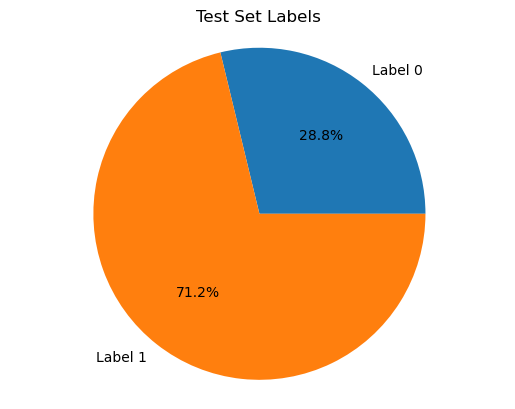

In [22]:
fig, ax = plt.subplots()
ax.pie([y_test.value_counts()[0],y_test.value_counts()[1]], labels=["Label 0", "Label 1"], autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Test Set Labels')

The table below shows the basic statistic for our training dataset.

In [23]:
X_train.describe()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
count,71672.000000,71672.000000,71672.000000,71672.000000,71672.000000,71672.000000,71672.000000,71672.000000,71672.000000,71672.000000,71672.000000,7.167200e+04,71672.000000
mean,0.476948,0.560217,0.045537,0.005990,0.720926,0.744602,0.845535,0.010288,0.005747,0.012099,0.005534,3.607199e-03,0.322967
std,0.179384,0.159071,0.170930,0.037864,0.104808,0.122200,0.147325,0.076757,0.049609,0.086003,0.048500,3.975403e-02,0.296619
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.416561,0.543169,0.001121,0.000000,0.677831,0.677171,0.733489,0.000062,0.000020,0.000100,0.000019,7.659916e-07,0.083762
50%,0.515707,0.594477,0.004433,0.000000,0.716746,0.756442,0.878233,0.000123,0.000040,0.000197,0.000037,1.432071e-06,0.194174
75%,0.587137,0.653894,0.019433,0.000487,0.781818,0.810274,0.970807,0.000143,0.000047,0.000230,0.000043,1.665199e-06,0.551714
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.998917,1.000000,1.000000,1.000000,1.000000e+00,1.000000


The table below shows the basic statistic for our test dataset.

In [24]:
X_test.describe()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
count,12526.000000,12526.000000,12526.000000,12526.000000,12526.000000,12526.000000,12526.000000,12526.000000,12526.000000,12526.000000,12526.000000,12526.000000,12526.000000
mean,0.464844,0.586315,0.034599,0.004559,0.724818,0.727134,0.863081,0.007336,0.004142,0.008545,0.003993,0.002637,0.420469
std,0.174468,0.137481,0.136697,0.030984,0.088136,0.101993,0.145482,0.065182,0.043231,0.071659,0.042347,0.035425,0.303578
min,0.000000,0.000465,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.406523,0.570897,0.002233,0.000000,0.689633,0.675693,0.871129,0.000088,0.000029,0.000141,0.000026,0.000001,0.145121
50%,0.514523,0.611542,0.016467,0.000000,0.719298,0.686526,0.883783,0.000126,0.000041,0.000202,0.000037,0.000001,0.373285
75%,0.578228,0.659789,0.019850,0.000638,0.778309,0.781224,0.950355,0.000146,0.000048,0.000234,0.000043,0.000002,0.684622
max,1.000000,1.000000,1.000000,0.695201,0.999362,0.998523,0.999445,1.000000,0.990890,1.000000,0.990353,0.985488,0.999920


The table below shows the basic statistic for our original dataset.

In [25]:
data.describe()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


**<h2> Model Training**

<h3> Binomial Logistic Regression

In [26]:
logreg = SGDClassifier(loss='log', eta0=0.001, learning_rate='optimal', random_state=1, verbose=0)
max_epochs = 200

In [27]:
class DataLoader(object):

    def __init__(self, X, y, batch_size):
        self.X = X
        self.y = y
        self.batch_size = batch_size

        self.indices = np.array([i for i in range(self.X.shape[0])])
        np.random.seed(1)

    def shuffle(self):
        np.random.shuffle(self.indices)

    def get_batch(self, mode='train'):
        X_batch = []
        y_batch = []

        if mode == 'train':
            self.shuffle()
            
        elif mode == 'test':
            self.indices = np.array([i for i in range(self.X.shape[0])])

        for i in range(0, len(self.indices), self.batch_size):
            if i + self.batch_size <= len(self.indices):
                indices = self.indices[i:i + self.batch_size]
            else:
                indices = self.indices[i:]

            X_batch.append(self.X.iloc[indices])
            y_batch.append(self.y.iloc[indices])

        return X_batch, y_batch

In [28]:
data_loader = DataLoader(X=X_train, y=y_train, batch_size=128)

In [29]:
from sklearn.metrics import log_loss

e = 0
is_converged = False
previous_loss = 0
labels = np.unique(y_train)

while e < max_epochs and is_converged is not True:
    
    loss=0
    
    X_batch,y_batch = data_loader.get_batch()
    
    for X,y in zip(X_batch,y_batch):
        logreg.partial_fit(X,y,classes=labels)
        y_pred = logreg.predict_proba(X_train)
        loss += log_loss(y_train,y_pred)
        
    print('Epoch:', e + 1, '\tLoss:', (loss / len(X_batch)))
    
    if abs(previous_loss - loss)<0.1:
        is_converged = True
    else:
        previous_loss = loss
        e +=1

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.wa

Epoch: 1 	Loss: 0.16895500528658594


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.wa

Epoch: 2 	Loss: 0.14572109798156493


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.wa

Epoch: 3 	Loss: 0.14472315260651852


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.wa

Epoch: 4 	Loss: 0.1444506585340476


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.wa

Epoch: 5 	Loss: 0.14424895020709025


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.wa

Epoch: 6 	Loss: 0.14403637994757792


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.wa

Epoch: 7 	Loss: 0.14403946845675616


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:173: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.wa

In [30]:
predictions = logreg.predict(X_test)
print(predictions)

[0 1 0 ... 1 0 0]


In [31]:
num_correct = np.sum(predictions == y_test)
print(num_correct, 'out of', len(y_test))

11684 out of 12526


In [32]:
accuracy = num_correct / len(y_test) * 100
print(accuracy, '%')

93.27798179786045 %


In [33]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      3605
           1       0.99      0.91      0.95      8921

    accuracy                           0.93     12526
   macro avg       0.91      0.95      0.92     12526
weighted avg       0.94      0.93      0.93     12526



<h3> Gaussian Naive Bayes

Let's start by creating the model and training the model with our training set

In [34]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

Next let's now generate predictions using test data

In [35]:
predictions = gnb.predict(X_test)
predictions

array([1, 1, 1, ..., 1, 1, 1])

Let's now test if our model generated accurate predictions

In [36]:
num_correct = np.sum(predictions == y_test)
print(num_correct, 'out of', len(y_test))

10240 out of 12526


In [37]:
accuracy = num_correct / len(y_test) * 100
print(accuracy, '%')

81.7499600830273 %


As seen in the data above, overall the model's accuracy is fairly accurate with only an accuracy score of 81.75%

Lets display a classification report to further evaluate the overall performance of the model

In [38]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.42      0.57      3605
           1       0.81      0.98      0.88      8921

    accuracy                           0.82     12526
   macro avg       0.84      0.70      0.73     12526
weighted avg       0.83      0.82      0.79     12526



<h3> k Nearest Neighbors

KNN is suitable for this dataset because of how the dataset contains different numerical values. By using kNN, we will be using the euclidean distance or manhattan distance to get the nearest neighbors and predict data.

Let's import the `KNeighborsClassifier` class.

In [37]:
from sklearn.neighbors import KNeighborsClassifier

We will be setting the hyperparameter k = 5.

In [38]:
neighbors = 5

Assign the `KNeighborsClassifier` object to `knn` and use `fit()` to train the model.

In [39]:
knn = KNeighborsClassifier(n_neighbors = neighbors)
knn = knn.fit(X_train, y_train)

Let us test the training model using `predict()`.

In [40]:
y_train_knn = knn.predict(X_train)

Let's now look at the accuracy of the model in the train set. As seen in the data below, 71667 out of 71672 are correct and the model's accuracy in the train set is 99.99%.

In [41]:
num_correct = np.sum(y_train_knn == y_train)
print(num_correct, 'out of', len(y_train))

71667 out of 71672


In [42]:
accuracy = num_correct / len(y_train) * 100
print(accuracy, '%')

99.99302377497489 %


Next, let's now test the test model using `predict()`.

In [43]:
y_test_knn = knn.predict(X_test)

Let's use the function `classification_report()` to evaluate the performance of our model. According to the output, we have produced pretty good results.

In [44]:
printClassificationReport = classification_report(y_test, y_test_knn)
print(printClassificationReport)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3605
           1       1.00      1.00      1.00      8921

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526



Let's now look at the accuracy of the model in the test set. As seen in the data below, 12524 out of 12526 are correct and the model's accuracy in the test set is 99.98%.

In [45]:
num_correct = np.sum(y_test_knn == y_test)
print(num_correct, 'out of', len(y_test))

12525 out of 12526


In [46]:
accuracy = num_correct / len(y_test) * 100
print(accuracy, '%')

99.99201660546065 %


Let's compare our Train Score and Test Score.

In [47]:
print('KNN Train Score: ', knn.score(X_train, y_train))
print('KNN Test Score: ', knn.score(X_test, y_test))

KNN Train Score:  0.9999302377497489
KNN Test Score:  0.9999201660546064


#### Cross-Validation for kNN

Instead of hyperparameter tuning, we will be doing cross-validation for kNN since results show we already have high accuracy. For cross-validation, we will be testing whether or not our k has the best results by using the k-fold cross-validation method.

Let us first import the packages needed for cross-validation.

In [48]:
from sklearn.model_selection import cross_val_predict, cross_val_score

`k_folds` will be set to 10.

In [49]:
k_folds = 10

`k_choices` will be an array of hyperparameter `k` that we will be testing in order to find the best one. We will also set the `scores` matrix temporarily to 0.

In [50]:
k_choices = [1, 3, 5, 7, 9, 11, 13, 15, 17, 20, 40, 50, 60, 80, 100]
scores = np.zeros((len(k_choices), k_folds))

We will now look at the k-folds per hyperparameter `k` in `k_choices` and see which is the best one by showing the scores per fold in each k and compute the average accuracy.

In [51]:
X = np.concatenate((X_train,X_test),axis=0)
y = np.concatenate((y_train,y_test),axis=0)
for i in range(len(k_choices)):
    print("k is : " + str(k_choices[i]))
    model = KNeighborsClassifier(n_neighbors=k_choices[i])
    scores[i] = cross_val_score(model.fit(X_train, y_train), X, y, cv=k_folds)
    print("Scores per fold :\n" + str(scores[i]))
    print("Average accuracy : " + str(np.sum(scores[i]) / len(scores[i])))

k is : 1
Scores per fold :
[0.99988124 1.         0.99976247 0.99988124 1.         1.
 0.99988124 0.99988124 0.99976244 1.        ]
Average accuracy : 0.9999049853021627
k is : 3
Scores per fold :
[1.         1.         0.99976247 0.99988124 1.         1.
 0.99988124 0.99988124 0.99976244 1.        ]
Average accuracy : 0.9999168617867232
k is : 5
Scores per fold :
[1.         1.         0.99964371 0.99988124 1.         1.
 0.99988124 0.99988124 0.99988122 1.        ]
Average accuracy : 0.9999168631973996
k is : 7
Scores per fold :
[1.         1.         0.99952494 0.99988124 1.         1.
 0.99988124 0.99988124 0.99988122 1.        ]
Average accuracy : 0.9999049867128391
k is : 9
Scores per fold :
[1.         1.         0.99952494 0.99988124 1.         1.
 0.99988124 0.99976247 0.99976244 0.99940611]
Average accuracy : 0.9998218428568567
k is : 11
Scores per fold :
[1.         1.         0.99940618 0.99988124 0.99988124 1.
 1.         0.99988124 0.99976244 0.99928733]
Average accuracy 

As seen in the output above, as the hyperparameter `k` increases the average accuracy becomes lower, however it is still super high and its change is very minimal.

The scatter graph shows 

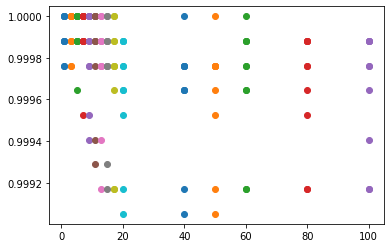

In [78]:
def plot_scatter(scores):
    for i in range(len(scores)):
        x = [k_choices[i]] * 10
        plt.scatter(x, scores[i])
plot_scatter(scores)

In [75]:
average_accuracy_mean = np.mean(scores,axis=1)
avg_scores = average_accuracy_mean

average_accuracy_std = np.std(scores, axis=1)
stddev_scores = average_accuracy_std

Text(0, 0.5, 'Cross-validation accuracy')

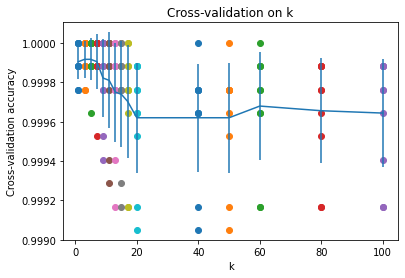

In [76]:
plot_scatter(scores)

plt.errorbar(k_choices, avg_scores, yerr=stddev_scores)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')

**<h2> Hyperparameter Tuning**



<h3> Binomial Logistic Regression

In [53]:
from sklearn.model_selection import GridSearchCV

params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "eta0" : [0.0001, 0.001, 0.01, 0.1],
    "learning_rate" : ["constant", "optimal"],
}

model = SGDClassifier(max_iter=1000)
clf = GridSearchCV(model, param_grid=params)

In [54]:
clf.fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_estimator_)

/Users/leigh/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/leigh/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/leigh/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/leigh/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
 

/Users/leigh/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/leigh/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/leigh/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/Users/leigh/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
 

0.9723880802941863
SGDClassifier(eta0=0.0001, loss='squared_hinge')


/Users/leigh/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:704: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


### Log Loss

In [55]:
logmodel = SGDClassifier(loss='log', eta0=0.01)

In [56]:
from sklearn.metrics import log_loss

e = 0
is_converged = False
previous_loss = 0
labels = np.unique(y_train)

while e < max_epochs and is_converged is not True:
    
    loss=0
    
    X_batch,y_batch = data_loader.get_batch()
    
    for X,y in zip(X_batch,y_batch):
        logreg.partial_fit(X,y,classes=labels)
        y_pred = logreg.predict_proba(X_train)
        loss += log_loss(y_train,y_pred)
        
    print('Epoch:', e + 1, '\tLoss:', (loss / len(X_batch)))
    
    if abs(previous_loss - loss)<0.1:
        is_converged = True
    else:
        previous_loss = loss
        e +=1

Epoch: 1 	Loss: 0.143818372920647
Epoch: 2 	Loss: 0.1436626227947015


In [57]:
predictions = logreg.predict(X_test)
print(predictions)

[0 1 0 ... 1 0 0]


In [58]:
num_correct = np.sum(predictions == y_test)
print(num_correct, 'out of', len(y_test))

11600 out of 12526


In [59]:
accuracy = num_correct / len(y_test) * 100
print(accuracy, '%')

92.60737665655437 %


In [60]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.98      0.88      3605
           1       0.99      0.90      0.95      8921

    accuracy                           0.93     12526
   macro avg       0.90      0.94      0.91     12526
weighted avg       0.94      0.93      0.93     12526



### Squared Hinge Loss

In [61]:
sqhinge = SGDClassifier(loss='squared_hinge', eta0=0.0001)

In [62]:
sqhinge.fit(X_train, y_train)

/Users/leigh/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:704: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(eta0=0.0001, loss='squared_hinge')

In [63]:
predictions = sqhinge.predict(X_test)
print(predictions)

[0 1 1 ... 1 0 0]


In [64]:
num_correct = np.sum(predictions == y_test)
print(num_correct, 'out of', len(y_test))

12209 out of 12526


In [65]:
accuracy = num_correct / len(y_test) * 100
print(accuracy, '%')

97.46926393102348 %


In [66]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      3605
           1       0.99      0.98      0.98      8921

    accuracy                           0.97     12526
   macro avg       0.97      0.97      0.97     12526
weighted avg       0.98      0.97      0.97     12526



<h3> k Nearest Neighbors

As seen in the model training, KNN does not need a complex hyperparameter tuning since it already has a high accuracy score without it and KNN usually produces high accuracy with little to no hyperparameter tuning.

KNN also only has one hyperparameter which is k. K is the number of nearest neighbors that the model will be taken into account when making a prediciton.

Instead of hyperparameter tuning we instead used cross-validation. By using cross-validation, we can easily tune the hyperparameter k, and we will be able to see how different k values affect how well the model performs.

<h3> Gaussian Naive Bayes

To get started with tuning the hyperparameters, we will be using the Repeated Stratified K-Fold cross validator method

In [67]:
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

Next we will use `GridSearchCV` to find the optimal parameter for our model

In [68]:
from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=gnb, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(X_test)

gs_NB.fit(Data_transformed, y_test)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [69]:
gs_NB.best_params_

{'var_smoothing': 0.0002310129700083158}

As seen above, the optimal value for the `var_smoothing` variable is `0.0002310129700083158`

In [70]:
gs_NB.best_score_

0.8808080354321951

In [71]:
predict_test = gs_NB.predict(Data_transformed)

num_correct = np.sum(predict_test == y_test)

accuracy_test = num_correct / len(y_test) * 100
print(accuracy_test, '%')

88.06482516365959 %


After tuning the hyperparameters the model was able to produce an accuracy score of 88% which is an improvement from the initial score which was at 81%. So it can be determined that the hyperparameter tuning was able to improve our model's accuracy score

**<h2> Model Selection**

The Binomial Logistic Regression model initially got an accuracy score of `92%`, but after tuning its hyperparameters we were able to achieve a `97%` accuracy score. We used `GridSearchCV` to test different parameters and discover the best performing one. After running this the optimal parameters discovered were a initial learning rate at `0.0001` and the loss function set to `squared hinge`.

The Gaussian Naive Bayes model initially only scored `81%`. `GridSearchCV` was also used to discover the most optimal parameter while also using the Repeated Stratified K-Fold cross validator. The most optimal parameter discovered was when the `var_smoothing` was set to `0.0002310129700083158` which produced an `88%` accuracy score which is lower than the previous model discussed.

Based on the results we gathered the KNN model would be the best fit for this dataset as it had the highest accuracy score with a score of `99%` without needing to perform hyperparameter tuning.

**<h2> Insights and Conclusion**

**<h2> References**

Brownlee, J. (2018). A Gentle Introduction to k-fold Cross-Validation - MachineLearningMastery.com. MachineLearningMastery.com. https://machinelearningmastery.com/k-fold-cross-validation/

Allibhai, E. (2018). Building a k-Nearest-Neighbors (k-NN) Model with Scikit-learn. Medium; Towards Data Science. https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a

Rose, N. (2017). *SGDClassifier.* Kaggle. https://www.kaggle.com/code/nsrose7224/sgdclassifier/notebook

Vardhan, V. (2022). *Smoke Detection Cross Model Validation.* Kaggle. 
https://www.kaggle.com/code/vishnuvardhan97/smoke-detection-cross-model-validation